# Setup

In [1]:
from twins_embedding import TwinsEmbeddingAnalysis
from matplotlib import pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from idrtools import math
from utils import frac_to_mag
import utils

/home/kyle/supernova/snfactory/manifold_twins/analysis/twins_embedding.py:15: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
%matplotlib inline

In [3]:
a = TwinsEmbeddingAnalysis()
a.settings['figure_directory'] = './output_standardization/figures/'
a.settings['latex_directory'] = './output_standardization/latex/'
a.run_analysis()

Loading dataset...
    IDR:          BLACKSTON
    Phase range: [-5.0, 5.0] days
    Bin velocity: 1000.0



Estimating the spectra at maximum light...
    Loaded cached stan model
    Using saved stan result
Reading between the lines...
    Loaded cached stan model
    Using saved stan result
Building masks...
    Masking 30/203 targets whose uncertainty power is 
    more than 0.100 of the intrinsic power.
Generating the manifold learning embedding...
Loading other indicators of diversity...


/home/kyle/packages/conda/lib/python3.8/site-packages/numpy/ma/core.py:2794: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/kyle/packages/conda/lib/python3.8/site-packages/george/kernels.py:95: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)


Fitting RBTL Twins Manifold GP...
GP magnitude residuals fit:
    Fit result:           b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
    intrinsic_dispersion      0.073 ± 0.008
    gp_kernel_amplitude       0.164 ± 0.082
    gp_length_scale           5.541 ± 3.315
    offset                    -0.116 ± 0.124
    covariate_slope_0         -0.122 ± 0.051
    Fit NMAD                  0.083 mag
    Fit std                   0.101 mag
Fitting SALT2 Twins Manifold GP...
GP magnitude residuals fit:
    Fit result:           b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
    intrinsic_dispersion      0.085 ± 0.010
    gp_kernel_amplitude       0.380 ± 0.231
    gp_length_scale           8.631 ± 5.329
    offset                    6.956 ± 0.299
    covariate_slope_0         2.810 ± 0.153
    Fit NMAD                  0.105 mag
    Fit std                   0.118 mag
Calculating SALT2 magnitude residuals...
SALT2 magnitude residuals fit: 
    ref_mag: 7.051
    alpha:   0.148
    beta

# Sample selection and attrition

## Look at which SNe~Ia are included or rejected

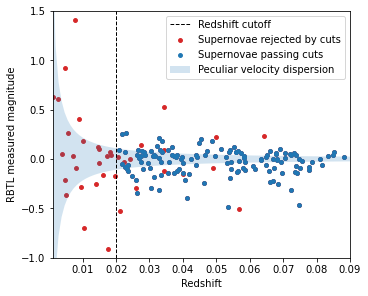

In [4]:
# Raw RBTL magnitude
plt.figure()

plt.scatter(a.redshifts[a.uncertainty_mask], a.rbtl_mags[a.uncertainty_mask], s=15, c='C3', label='Supernovae rejected by cuts')
plt.scatter(a.redshifts[a.uncertainty_mask & a.redshift_color_mask], a.rbtl_mags[a.uncertainty_mask & a.redshift_color_mask], s=15, c='C0', label='Supernovae passing cuts')

z_range = np.linspace(0.001, 0.09, 100)
pec_vel_disp = a.calculate_peculiar_velocity_uncertainties(z_range)
plt.fill_between(z_range, -pec_vel_disp, pec_vel_disp, alpha=0.2, label='Peculiar velocity dispersion')
plt.axvline(0.02, lw=1, ls='--', c='k', label='Redshift cutoff')

plt.xlim(0.001, 0.09)
plt.ylim(-1, 1.5)
plt.xlabel('Redshift')
plt.ylabel('RBTL measured magnitude')
plt.legend()
a.savefig('rbtl_magnitude.pdf')

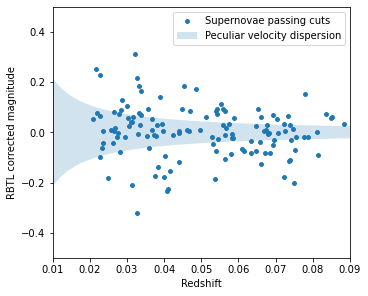

In [5]:
# Corrected RBTL magnitude
plt.figure()

plt.scatter(
    a.redshifts[a.uncertainty_mask & a.redshift_color_mask],
    a.residuals_rbtl_gp.residuals[a.uncertainty_mask & a.redshift_color_mask],
    s=15, c='C0', label='Supernovae passing cuts'
)
# plt.scatter(
    # a.redshifts[a.uncertainty_mask & ~a.redshift_color_mask],
    # a.residuals_rbtl_gp.residuals[a.uncertainty_mask & ~a.redshift_color_mask],
    # s=15, c='C3', label='Supernovae rejected by cuts'
# )
plt.xlabel('Redshift')
plt.ylabel('RBTL corrected magnitude')

z_range = np.linspace(0.001, 0.09, 100)
pec_vel_disp = a.calculate_peculiar_velocity_uncertainties(z_range)
plt.fill_between(z_range, -pec_vel_disp, pec_vel_disp, alpha=0.2, label='Peculiar velocity dispersion')
# plt.fill_between(z_range, -2*pec_vel_disp, 2*pec_vel_disp, alpha=0.1, facecolor='C0')
# plt.fill_between(z_range, -3*pec_vel_disp, 3*pec_vel_disp, alpha=0.1, facecolor='C0')

plt.legend()
plt.xlim(0.01, 0.09)
plt.ylim(-0.5, 0.5)
a.savefig('rbtl_corr_magnitude_cut.pdf')

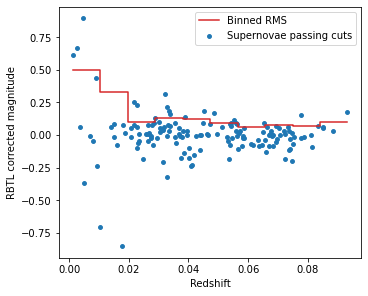

In [6]:
# Corrected RBTL magnitude
plt.figure()

base_mask = a.uncertainty_mask & (a.redshift_errs < 0.004) & ((a.rbtl_colors - np.median(a.rbtl_colors)) < 0.5)

plt.scatter(
    a.redshifts[base_mask],
    a.residuals_rbtl_gp.residuals[base_mask],
    s=15, c='C0', label='Supernovae passing cuts'
)
# plt.scatter(
    # a.redshifts[a.uncertainty_mask & ~a.redshift_color_mask],
    # a.residuals_rbtl_gp.residuals[a.uncertainty_mask & ~a.redshift_color_mask],
    # s=15, c='C3', label='Supernovae rejected by cuts'
# )
plt.xlabel('Redshift')
plt.ylabel('RBTL corrected magnitude')

math.plot_binned_rms(
    a.redshifts[base_mask],
    a.residuals_rbtl_gp.residuals[base_mask],
    c='C3',
    label='Binned RMS'
)

# z_range = np.linspace(0.001, 0.09, 100)
# pec_vel_disp = a.calculate_peculiar_velocity_uncertainties(z_range)
# plt.fill_between(z_range, -pec_vel_disp, pec_vel_disp, alpha=0.2, label='Peculiar velocity dispersion')
# plt.fill_between(z_range, -2*pec_vel_disp, 2*pec_vel_disp, alpha=0.1, facecolor='C0')
# plt.fill_between(z_range, -3*pec_vel_disp, 3*pec_vel_disp, alpha=0.1, facecolor='C0')

plt.legend()
# plt.xlim(0.01, 0.09)
# plt.ylim(-0.5, 0.5)
a.savefig('rbtl_corr_magnitude_cut.pdf')

<ipython-input-7-fd75dc86ab1b>:20: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


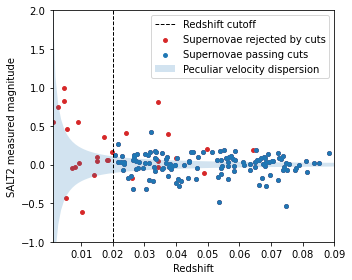

In [7]:
plt.figure()

base_mask = a.uncertainty_mask & a.salt_mask
salt_hr = a.residuals_salt['residuals']

plt.scatter(a.redshifts[base_mask], salt_hr[base_mask], s=15, c='C3', label='Supernovae rejected by cuts')
plt.scatter(a.redshifts[base_mask & a.redshift_color_mask], salt_hr[base_mask & a.redshift_color_mask], s=15, c='C0', label='Supernovae passing cuts')

z_range = np.linspace(0.001, 0.09, 100)
pec_vel_disp = 0.00217 / z_range
plt.fill_between(z_range, -pec_vel_disp, pec_vel_disp, alpha=0.2, label='Peculiar velocity dispersion')
plt.axvline(0.02, lw=1, ls='--', c='k', label='Redshift cutoff')

plt.xlim(0.001, 0.09)
# plt.ylim(-1, 1.5)
plt.ylim(-1, 2.)
plt.xlabel('Redshift')
plt.ylabel('SALT2 measured magnitude')
plt.legend()
plt.tight_layout()
a.savefig('salt_magnitude_redshift.pdf')

# Standardization

## Raw magnitudes

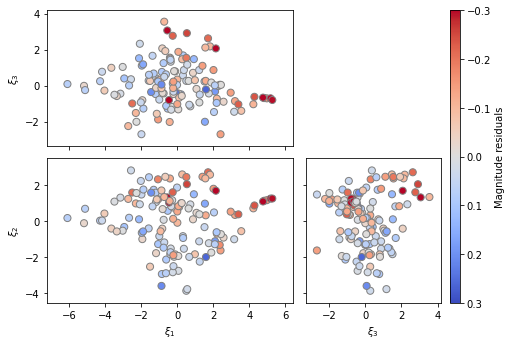

In [8]:
a.scatter_combined(a.rbtl_mags, a.uncertainty_mask & a.redshift_color_mask, vmin=-0.3, vmax=0.3, label='Magnitude residuals', invert_colorbar=True)
a.savefig('embedding_residual_magnitudes.pdf')

## GP standardization

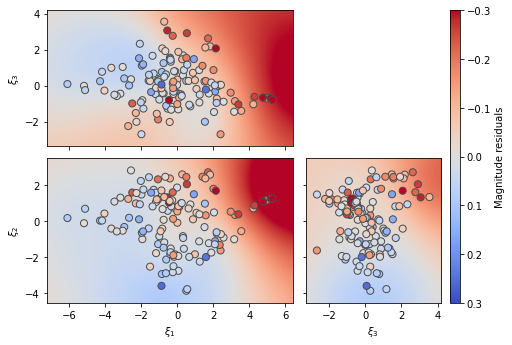

In [9]:
a.residuals_rbtl_gp.plot()
a.savefig('rbtl_gp_predictions.pdf')

## GP standardization residuals

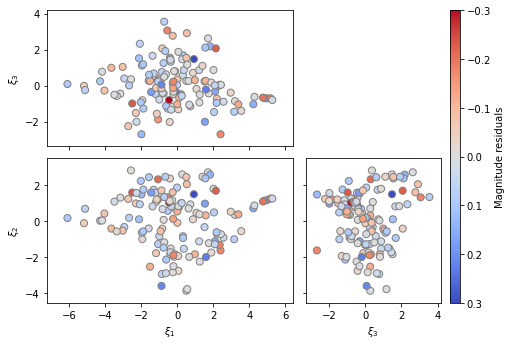

In [10]:
a.scatter_combined(a.residuals_rbtl_gp.residuals, a.uncertainty_mask & a.redshift_color_mask, vmin=-0.3, vmax=0.3, label='Magnitude residuals', invert_colorbar=True)
a.savefig('rbtl_gp_residuals.pdf')

## Standardization table

In [11]:
from functools import partial

def int_disp(vals, pec_vel_disps, axis=None):
    std = np.std(vals, ddof=1, axis=axis)
    corr = np.mean(pec_vel_disps**2, axis=axis)
    corr_std = np.sqrt(np.clip(std**2 - corr, 0, None))

    return corr_std

def get_stat_str(all_mags, cut, function, *args):
    line_str = ""
    for mags in all_mags:
        if line_str:
            line_str += " &"
            
        use_mags = mags[cut]
        if np.any(np.isnan(use_mags)):
            line_str += "%20s" % "--"
        else:
            res, res_err = math.bootstrap_statistic(function, use_mags, *args)
            line_str += "%7.3f $\pm$ %6.3f" % (res, res_err)
    
    line_str += " \\\\"
    
    return line_str

def make_table(f, all_mags, cut, label):
    stats = {
        'NMAD': (math.nmad,),
        'RMS': (partial(np.std, ddof=1),),
        'Pec. vel. removed': (int_disp, a.calculate_peculiar_velocity_uncertainties(a.redshifts)[cut]),
    }
    for i, (stat_name, stat_args) in enumerate(stats.items()):
        if len(label) > i:
            prefix = label[i]
        else:
            prefix = ""
            
        if i == 0:
            num_sne = "%d" % np.sum(cut)
        else:
            num_sne = ""
            
        stat_str = get_stat_str(all_mags, cut, *stat_args)
        utils.latex_print(f, "%25s & %5s & %20s & %s" % (prefix, num_sne, stat_name, stat_str))

# Get all of the different residuals. Set things that I shouldn't be using to nan
# so that they get masked out in the table.
base_mask = a.uncertainty_mask & a.redshift_color_mask
rbtl_residuals = a.rbtl_mags.copy()
rbtl_gp_residuals = a.residuals_rbtl_gp.residuals.copy()
salt_gp_residuals = a.residuals_salt_gp.residuals.copy()
salt_residuals = a.residuals_salt['residuals'].copy()

rbtl_residuals[~base_mask] = np.nan
rbtl_gp_residuals[~base_mask] = np.nan
salt_gp_residuals[~(base_mask & a.salt_mask)] = np.nan
salt_residuals[~(base_mask & a.salt_mask)] = np.nan

# Redo all of the fits conditioning only on the training set.
base_train_mask = base_mask & a.train_mask
train_rbtl_residuals = a.rbtl_mags.copy()
train_rbtl_gp_residuals = a.fit_gp_magnitude_residuals(mask=base_train_mask, verbosity=0).residuals
train_salt_gp_residuals = a.fit_gp_magnitude_residuals('salt_raw', mask=base_train_mask, verbosity=0).residuals
train_salt_residuals = a.fit_salt_magnitude_residuals(mask=base_train_mask, verbosity=0)['residuals']

train_rbtl_residuals[~base_train_mask] = np.nan
train_rbtl_gp_residuals[~base_train_mask] = np.nan
train_salt_gp_residuals[~(base_train_mask & a.salt_mask)] = np.nan
train_salt_residuals[~(base_train_mask & a.salt_mask)] = np.nan

# Redo all of the fits conditioning only on the validation set.
base_validation_mask = base_mask & ~a.train_mask
validation_rbtl_residuals = a.rbtl_mags.copy()
validation_rbtl_gp_residuals = a.fit_gp_magnitude_residuals(mask=base_validation_mask, verbosity=0).residuals
validation_salt_gp_residuals = a.fit_gp_magnitude_residuals('salt_raw', mask=base_validation_mask, verbosity=0).residuals
validation_salt_residuals = a.fit_salt_magnitude_residuals(mask=base_validation_mask, verbosity=0)['residuals']

validation_rbtl_residuals[~base_validation_mask] = np.nan
validation_rbtl_gp_residuals[~base_validation_mask] = np.nan
validation_salt_gp_residuals[~(base_validation_mask & a.salt_mask)] = np.nan
validation_salt_residuals[~(base_validation_mask & a.salt_mask)] = np.nan


all_residuals = [rbtl_residuals, rbtl_gp_residuals, salt_residuals, salt_gp_residuals]
all_train_residuals = [train_rbtl_residuals, train_rbtl_gp_residuals, train_salt_residuals, train_salt_gp_residuals]
all_validation_residuals = [validation_rbtl_residuals, validation_rbtl_gp_residuals, validation_salt_residuals, validation_salt_gp_residuals]

with a.latex_open('dispersion_table.tex') as f:
    # full manifold - all
    make_table(f, all_residuals, base_mask, ['Full sample'])
    utils.latex_print(f, "\hline")

    # SALT2 subsample - all
    make_table(f, all_residuals, base_mask & a.salt_mask, ['Sample', 'with valid', 'SALT2 fits'])
    utils.latex_print(f, "\hline")
    
    # full manifold - training
    make_table(f, all_train_residuals, base_train_mask, ['Training sample'])
    utils.latex_print(f, "\hline")

    # full manifold - validation
    make_table(f, all_validation_residuals, base_validation_mask, ['Validation sample'])
    utils.latex_print(f, "\hline")
    
    # SALT2 subsample - training
    # make_table(f, all_train_residuals, base_train_mask & a.salt_mask, ['Training sample', 'with valid', 'SALT2 fits'])
    # utils.latex_print(f, "\hline")

    # SALT2 subsample - validation
    # make_table(f, all_residuals, base_mask & ~a.train_mask & a.salt_mask, ['Validation sample', 'with valid', 'SALT2 fits'])
    # utils.latex_print(f, "\hline")

/home/kyle/packages/conda/lib/python3.8/site-packages/george/kernels.py:95: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)


              Full sample &   134 &                 NMAD &   0.108 $\pm$  0.013 &  0.083 $\pm$  0.010 &                  -- &                  -- \\
                          &       &                  RMS &   0.131 $\pm$  0.010 &  0.101 $\pm$  0.007 &                  -- &                  -- \\
                          &       &    Pec. vel. removed &   0.119 $\pm$  0.011 &  0.084 $\pm$  0.009 &                  -- &                  -- \\
\hline
                   Sample &   127 &                 NMAD &   0.111 $\pm$  0.012 &  0.083 $\pm$  0.011 &  0.106 $\pm$  0.012 &  0.105 $\pm$  0.014 \\
               with valid &       &                  RMS &   0.131 $\pm$  0.011 &  0.100 $\pm$  0.008 &  0.140 $\pm$  0.012 &  0.118 $\pm$  0.008 \\
               SALT2 fits &       &    Pec. vel. removed &   0.120 $\pm$  0.012 &  0.084 $\pm$  0.009 &  0.129 $\pm$  0.014 &  0.104 $\pm$  0.009 \\
\hline
          Training sample &    72 &                 NMAD &   0.100 $\pm$  0.019 &  0.072 $\p

In [12]:
from functools import partial

def int_disp(vals, pec_vel_disps, axis=None):
    std = np.std(vals, ddof=1, axis=axis)
    corr = np.mean(pec_vel_disps**2, axis=axis)
    corr_std = np.sqrt(np.clip(std**2 - corr, 0, None))

    return corr_std

def get_stat_str(all_mags, cut, function, *args):
    line_str = ""
    for mags in all_mags:
        if line_str:
            line_str += " &"
            
        use_mags = mags[cut]
        if np.any(np.isnan(use_mags)):
            line_str += "%20s" % "--"
        else:
            res, res_err = math.bootstrap_statistic(function, use_mags, *args)
            line_str += "%7.3f $\pm$ %6.3f" % (res, res_err)
    
    line_str += " \\\\"
    
    return line_str

def make_table(f, mask, label):
    rbtl_residuals = a.rbtl_mags.copy()
    rbtl_gp = a.fit_gp_magnitude_residuals(mask=mask, verbosity=0)
    
    # Set things that I shouldn't be using to nan so that they get masked out in the table.
    rbtl_residuals[~mask] = np.nan
    rbtl_gp_residuals = rbtl_gp.residuals.copy()
    rbtl_gp_residuals[~mask] = np.nan
    
    int_disps = [None, (rbtl_gp.parameters[0], rbtl_gp.parameter_uncertainties[0])]

    if np.any(mask & ~a.salt_mask):
        # Not compatible with SALT2 fits
        salt_gp_residuals = np.ones_like(rbtl_residuals) * np.nan
        salt_fit_residuals = np.ones_like(rbtl_residuals) * np.nan

        int_disps.append(None)
        int_disps.append(None)
    else:
        salt_fit, bootstrap = a.bootstrap_salt_magnitude_residuals(num_samples=500, mask=mask)

        salt_fit_residuals = salt_fit['residuals'].copy()
        salt_fit_residuals[~(mask & a.salt_mask)] = np.nan
        
        int_disps.append((salt_fit['intrinsic_dispersion'], np.std(bootstrap['intrinsic_dispersion'])))

        salt_gp = a.fit_gp_magnitude_residuals('salt_raw', mask=mask, verbosity=0)
        salt_gp_residuals = salt_gp.residuals.copy()
        salt_gp_residuals[~(mask & a.salt_mask)] = np.nan
        
        int_disps.append((salt_gp.parameters[0], salt_gp.parameter_uncertainties[0]))

    all_mags = [rbtl_residuals, rbtl_gp_residuals, salt_fit_residuals, salt_gp_residuals]

    stats = {
        'NMAD': (math.nmad,),
        'RMS': (partial(np.std, ddof=1),),
        'Peculiar velocity removed': (int_disp, a.calculate_peculiar_velocity_uncertainties(a.redshifts)[mask]),
    }

    for i, (stat_name, stat_args) in enumerate(stats.items()):
        if len(label) > i:
            prefix = label[i]
        else:
            prefix = ""
            
        if i == 0:
            num_sne = "%d" % np.sum(mask)
        else:
            num_sne = ""
            
        stat_str = get_stat_str(all_mags, mask, *stat_args)
        utils.latex_print(f, "%25s & %5s & %20s & %s" % (prefix, num_sne, stat_name, stat_str))
        
    unexp_str = " & & Unexplained dispersion"
    for row in int_disps:
        if row is None:
            unexp_str += " & --"
        else:
            unexp_str += " & %7.3f $\pm$ %6.3f" % row
    unexp_str += " \\\\"
    utils.latex_print(f, unexp_str)


with a.latex_open('dispersion_table.tex') as f:
    # full manifold - all
    make_table(f, a.uncertainty_mask & a.redshift_color_mask, ['Full sample'])
    utils.latex_print(f, "\hline")

    # SALT2 subsample - all
    make_table(f, a.uncertainty_mask & a.redshift_color_mask & a.salt_mask, ['Sample', 'with valid', 'SALT2 fits'])
    utils.latex_print(f, "\hline")
    
    # full manifold - training
    make_table(f, a.uncertainty_mask & a.redshift_color_mask & a.train_mask, ['Training sample'])
    utils.latex_print(f, "\hline")

    # full manifold - validation
    make_table(f, a.uncertainty_mask & a.redshift_color_mask & ~a.train_mask, ['Validation sample'])
    utils.latex_print(f, "\hline")
    
    # SALT2 subsample - training
    # make_table(f, all_train_residuals, base_train_mask & a.salt_mask, ['Training sample', 'with valid', 'SALT2 fits'])
    # utils.latex_print(f, "\hline")

    # SALT2 subsample - validation
    # make_table(f, all_residuals, base_mask & ~a.train_mask & a.salt_mask, ['Validation sample', 'with valid', 'SALT2 fits'])
    # utils.latex_print(f, "\hline")

              Full sample &   134 &                 NMAD &   0.108 $\pm$  0.013 &  0.083 $\pm$  0.010 &                  -- &                  -- \\
                          &       &                  RMS &   0.131 $\pm$  0.010 &  0.101 $\pm$  0.007 &                  -- &                  -- \\
                          &       & Peculiar velocity removed &   0.119 $\pm$  0.012 &  0.084 $\pm$  0.009 &                  -- &                  -- \\
 & & Unexplained dispersion & -- &   0.073 $\pm$  0.008 & -- & -- \\
\hline


                   Sample &   127 &                 NMAD &   0.111 $\pm$  0.012 &  0.084 $\pm$  0.011 &  0.106 $\pm$  0.012 &  0.105 $\pm$  0.013 \\
               with valid &       &                  RMS &   0.131 $\pm$  0.011 &  0.100 $\pm$  0.008 &  0.140 $\pm$  0.012 &  0.118 $\pm$  0.008 \\
               SALT2 fits &       & Peculiar velocity removed &   0.120 $\pm$  0.012 &  0.084 $\pm$  0.009 &  0.129 $\pm$  0.013 &  0.104 $\pm$  0.009 \\
 & & Unexplained dispersion & -- &   0.072 $\pm$  0.008 &   0.118 $\pm$  0.016 &   0.085 $\pm$  0.010 \\
\hline
          Training sample &    72 &                 NMAD &   0.100 $\pm$  0.019 &  0.072 $\pm$  0.013 &                  -- &                  -- \\
                          &       &                  RMS &   0.126 $\pm$  0.013 &  0.099 $\pm$  0.011 &                  -- &                  -- \\
                          &       & Peculiar velocity removed &   0.112 $\pm$  0.015 &  0.081 $\pm$  0.014 &                  -- &        

## Standardization parameter dump

In [13]:
with a.latex_open('standardization_summary.tex') as f:
    # Raw RBTL magnitudes
    raw_rbtl_mags = a.rbtl_mags[a.uncertainty_mask & a.redshift_color_mask]
    utils.latex_std(f, 'rawrbtlmagstd', raw_rbtl_mags)
    utils.latex_nmad(f, 'rawrbtlmagnmad', raw_rbtl_mags)
    
    # Raw RBTL magnitudes with SALT2 cuts
    raw_rbtl_mags_salt_cuts = a.rbtl_mags[a.uncertainty_mask & a.redshift_color_mask & a.salt_mask]
    utils.latex_std(f, 'rawrbtlmagstdsaltcuts', raw_rbtl_mags_salt_cuts)
    utils.latex_nmad(f, 'rawrbtlmagnmadsaltcuts', raw_rbtl_mags_salt_cuts)

    # RBTL GP
    rbtl_gp = a.residuals_rbtl_gp
    rbtl_gp_mags = rbtl_gp.residuals[rbtl_gp.mask]
    utils.latex_print(f, '')
    utils.latex_std(f, 'rbtlgprms', rbtl_gp_mags)
    utils.latex_nmad(f, 'rbtlgpnmad', rbtl_gp_mags)
    utils.latex_command(f, 'rbtlgpintdisp', '%.3f $\\pm$ %.3f', (rbtl_gp.parameters[0], rbtl_gp.parameter_uncertainties[0]))
    utils.latex_command(f, 'rbtlgpkernelamp', '%.3f $\\pm$ %.3f', (np.abs(rbtl_gp.parameters[1]), rbtl_gp.parameter_uncertainties[1]))
    utils.latex_command(f, 'rbtlgpkernellengthscale', '%.2f $\\pm$ %.2f', (rbtl_gp.parameters[2], rbtl_gp.parameter_uncertainties[2]))
    utils.latex_command(f, 'rbtlgpoffset', '%.3f $\\pm$ %.3f', (rbtl_gp.parameters[3], rbtl_gp.parameter_uncertainties[3]))
    utils.latex_command(f, 'rbtlgprv', '%.2f $\\pm$ %.2f', a.calculate_fit_rv(rbtl_gp.parameters[4], rbtl_gp.parameter_uncertainties[4]))
    
    # RBTL GP with SALT2 cuts
    rbtl_gp_saltcut = a.fit_gp_magnitude_residuals(mask=a.salt_mask)
    rbtl_gp_mags_saltcut = rbtl_gp_saltcut.residuals[rbtl_gp_saltcut.mask]
    utils.latex_print(f, '')
    utils.latex_std(f, 'rbtlgprmssaltcut', rbtl_gp_mags_saltcut)
    utils.latex_nmad(f, 'rbtlgpnmadsaltcut', rbtl_gp_mags_saltcut)

    # SALT GP
    salt_gp = a.residuals_salt_gp
    salt_gp_mags = salt_gp.residuals[salt_gp.mask]
    utils.latex_print(f, '')
    utils.latex_std(f, 'saltgprms', salt_gp_mags)
    utils.latex_nmad(f, 'saltgpnmad', salt_gp_mags)
    utils.latex_command(f, 'saltgpintdisp', '%.3f $\\pm$ %.3f', (salt_gp.parameters[0], salt_gp.parameter_uncertainties[0]))
    utils.latex_command(f, 'saltgpkernelamp', '%.3f $\\pm$ %.3f', (np.abs(salt_gp.parameters[1]), salt_gp.parameter_uncertainties[1]))
    utils.latex_command(f, 'saltgpkernellengthscale', '%.2f $\\pm$ %.2f', (salt_gp.parameters[2], salt_gp.parameter_uncertainties[2]))
    utils.latex_command(f, 'saltgpoffset', '%.3f $\\pm$ %.3f', (salt_gp.parameters[3], salt_gp.parameter_uncertainties[3]))
    utils.latex_command(f, 'saltgpcolor', '%.2f $\\pm$ %.2f', (salt_gp.parameters[4], salt_gp.parameter_uncertainties[4]))
    rbtl_gp_mags_salt_comp = rbtl_gp.residuals[salt_gp.mask]
    utils.latex_std(f, 'rbtlgpsaltcomprms', rbtl_gp_mags_salt_comp)
    utils.latex_nmad(f, 'rbtlgpsaltcompnmad', rbtl_gp_mags_salt_comp)

    # Peculiar velocity contribution
    utils.latex_print(f, "")
    utils.latex_command(f, 'pecvelcontribution', '%.3f', np.sqrt(np.mean(a.calculate_peculiar_velocity_uncertainties(a.redshifts)[rbtl_gp.mask]**2)))
    rbtl_gp_pv_rem_rms = math.bootstrap_statistic(int_disp, rbtl_gp_mags, a.calculate_peculiar_velocity_uncertainties(a.redshifts)[rbtl_gp.mask])
    utils.latex_command(f, 'rbtlgppvremrms', '%.3f $\\pm$ %.3f', rbtl_gp_pv_rem_rms)
    salt_gp_pv_rem_rms = math.bootstrap_statistic(int_disp, salt_gp_mags, a.calculate_peculiar_velocity_uncertainties(a.redshifts)[salt_gp.mask])
    utils.latex_command(f, 'saltpgpvremrms', '%.3f $\\pm$ %.3f', salt_gp_pv_rem_rms)
    
    comp_mask = a.residuals_salt['mask'] & rbtl_gp.mask
    rbtl_gp_comp_pv_rem_rms = math.bootstrap_statistic(int_disp, rbtl_gp.residuals[comp_mask], a.calculate_peculiar_velocity_uncertainties(a.redshifts)[comp_mask])
    utils.latex_command(f, 'rbtlgpcomppvremrms', '%.3f $\\pm$ %.3f', rbtl_gp_comp_pv_rem_rms)
    salt_comp_pv_rem_rms = math.bootstrap_statistic(int_disp, a.residuals_salt['residuals'][comp_mask], a.calculate_peculiar_velocity_uncertainties(a.redshifts)[comp_mask])
    utils.latex_command(f, 'saltcomppvremrms', '%.3f $\\pm$ %.3f', salt_comp_pv_rem_rms)

\newcommand{\rawrbtlmagstd}{0.131 $\pm$ 0.010}
\newcommand{\rawrbtlmagnmad}{0.108 $\pm$ 0.013}
\newcommand{\rawrbtlmagstdsaltcuts}{0.131 $\pm$ 0.011}
\newcommand{\rawrbtlmagnmadsaltcuts}{0.111 $\pm$ 0.012}

\newcommand{\rbtlgprms}{0.101 $\pm$ 0.007}
\newcommand{\rbtlgpnmad}{0.083 $\pm$ 0.010}
\newcommand{\rbtlgpintdisp}{0.073 $\pm$ 0.008}
\newcommand{\rbtlgpkernelamp}{0.164 $\pm$ 0.082}
\newcommand{\rbtlgpkernellengthscale}{5.54 $\pm$ 3.31}
\newcommand{\rbtlgpoffset}{-0.116 $\pm$ 0.124}
\newcommand{\rbtlgprv}{2.40 $\pm$ 0.16}
GP magnitude residuals fit:
    Fit result:           b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
    intrinsic_dispersion      0.072 ± 0.008
    gp_kernel_amplitude       0.147 ± 0.067
    gp_length_scale           4.785 ± 2.674
    offset                    -0.126 ± 0.108
    covariate_slope_0         -0.143 ± 0.052
    Fit NMAD                  0.084 mag
    Fit std                   0.100 mag

\newcommand{\rbtlgprmssaltcut}{0.100 $\pm$ 0.008}
\newcomman

# SALT2 comparison

## SALT2 fit

## SALT2 magnitudes vs components

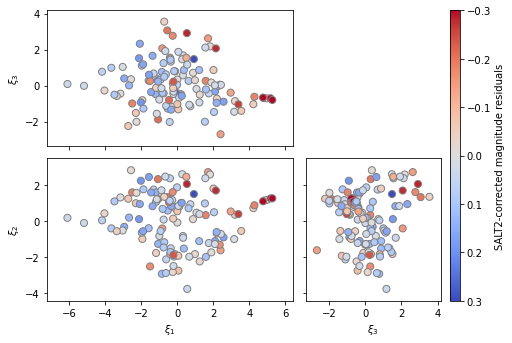

In [14]:
a.scatter_combined(a.residuals_salt['residuals'], mask=a.salt_mask & a.redshift_color_mask & a.uncertainty_mask, vmin=-0.3, vmax=0.3, label='SALT2-corrected magnitude residuals', invert_colorbar=True)
a.savefig('salt2_hr_embedding.pdf')


\newcommand{\saltfirstcompdiff}{0.229 $\pm$ 0.045}


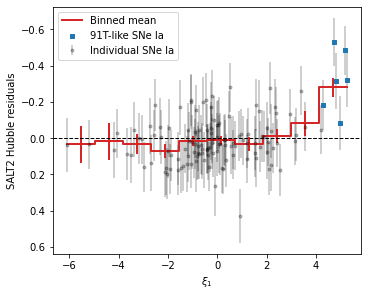

In [15]:
plt.figure()

use_x = a.embedding[:, 0]

mask = a.salt_mask & a.redshift_color_mask & a.uncertainty_mask
residuals = a.residuals_salt['residuals']
residual_uncertainties = a.residuals_salt['residual_uncertainties']

plt.errorbar(use_x[mask], residuals[mask], residual_uncertainties[mask], label='Individual SNe Ia', fmt='.', alpha=0.25, c='k')

mask_91t = a.indicators['peculiar_type'] == '91T-like'
plt.scatter(use_x[mask_91t & mask], residuals[mask_91t & mask], label='91T-like SNe Ia', s=15, marker='s', zorder=10)

from scipy.stats import binned_statistic
binned_mean, bin_edges, binnumber = binned_statistic(use_x[mask], residuals[mask], 'mean', bins=10)
binned_var_num, bin_edges, binnumber = binned_statistic(use_x[mask], residual_uncertainties[mask]**2, 'sum', bins=10)
binned_var_denom, bin_edges, binnumber = binned_statistic(use_x[mask], residual_uncertainties[mask]**2, 'count', bins=10)
binned_yerr = np.sqrt(binned_var_num / binned_var_denom**2)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_edges, np.hstack([binned_mean, binned_mean[-1]]), where='post', c='C3', lw=2, label='Binned mean')
plt.errorbar(bin_centers, binned_mean, yerr=binned_yerr, fmt='none', c='C3', lw=2)

plt.legend()

plt.gca().invert_yaxis()

plt.axhline(0, c='k', ls='--', lw=1)

plt.xlabel('$\\xi_1$')
plt.ylabel('SALT2 Hubble residuals')

a.savefig('salt2_hr_component_1.pdf')


with a.latex_open('salt_bias.tex') as f:
    utils.latex_print(f, "")
    m2 = use_x > 3
    r1 = residuals[mask & m2]
    r2 = residuals[mask & ~m2]
    u1 = residual_uncertainties[mask & m2]
    u2 = residual_uncertainties[mask & ~m2]
    m1 = np.mean(r1)
    m2 = np.mean(r2)
    diff = np.abs(m1 - m2)
    err1 = np.sqrt(np.sum(u1**2) / len(u1)**2)
    err2 = np.sqrt(np.sum(u2**2) / len(u2)**2)
    err = np.sqrt(err1**2 + err2**2)
    utils.latex_command(f, 'saltfirstcompdiff', '%.3f $\\pm$ %.3f', (diff, err))

## SALT2 x1 comparison

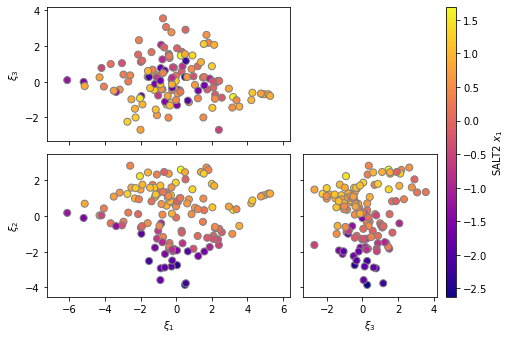

In [16]:
a.scatter_combined(a.salt_x1, mask=a.uncertainty_mask & a.redshift_color_mask, label='SALT2 $x_1$', cmap=plt.cm.plasma)
a.savefig('salt_x1_components.pdf')

## SALT2 + Twins Embedding standardization

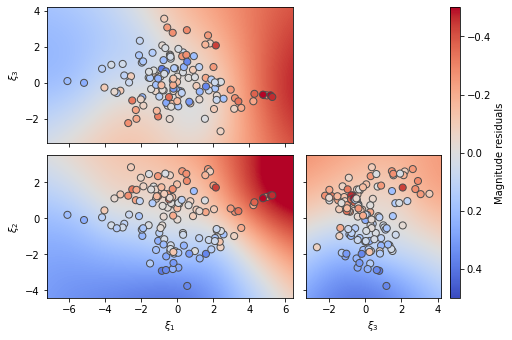

In [17]:
a.residuals_salt_gp.plot(vmin=-0.5, vmax=0.5)
a.savefig('salt_gp_standardization.pdf')

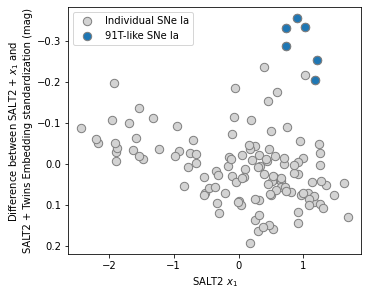

In [18]:
m = a.salt_mask & a.uncertainty_mask & a.redshift_color_mask
gp_residuals = a.residuals_salt_gp.residuals
salt_residuals = a.residuals_salt['residuals']

plt.figure()
# plt.scatter(a.salt_x1[m], (salt_residuals - gp_residuals)[m], c=a.embedding[m, 0], cmap=plt.cm.coolwarm, s=a.settings['scatter_plot_marker_size'], edgecolors='gray')
m2 = m & (a.indicators['peculiar_type'] == '91T-like')
plt.scatter(a.salt_x1[m], (salt_residuals - gp_residuals)[m], s=a.settings['scatter_plot_marker_size'], edgecolors='gray', c='lightgray', label='Individual SNe Ia')
plt.scatter(a.salt_x1[m2], (salt_residuals - gp_residuals)[m2], s=a.settings['scatter_plot_marker_size'], edgecolors='gray', c='C0', label='91T-like SNe Ia')
plt.gca().invert_yaxis()
plt.legend()
# plt.colorbar(label='$\\xi_1$', aspect=30)
plt.xlabel('SALT2 $x_1$')
# plt.ylabel('Difference between SALT2 + Twind Embedding\n and SALT2 standardization (mag)')
# plt.ylabel('Difference between SALT2 + Twins Embedding\n and SALT2 + $x_1$ standardization (mag)')
plt.ylabel('Difference between SALT2 + $x_1$ and \nSALT2 + Twins Embedding standardization (mag)')
a.savefig('salt_x1_manifold_difference.pdf')

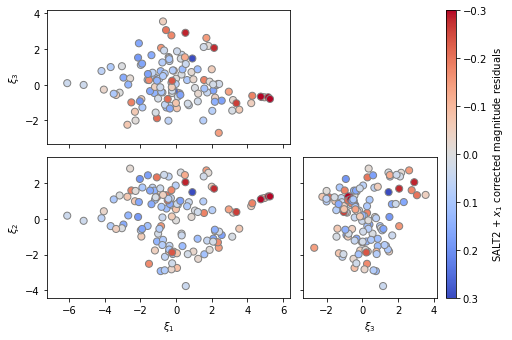

In [19]:
m = a.salt_mask & a.uncertainty_mask & a.redshift_color_mask
salt_residuals = a.residuals_salt['residuals']

a.scatter_combined(salt_residuals, mask=m, label='SALT2 + $x_1$ corrected magnitude residuals', invert_colorbar=True, vmin=-0.3, vmax=0.3)
a.savefig('salt_residuals_manifold.pdf')

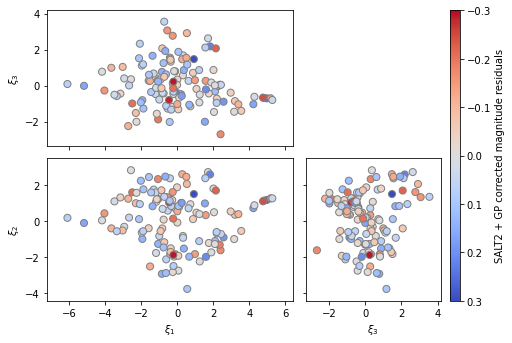

In [20]:
m = a.salt_mask & a.uncertainty_mask & a.redshift_color_mask
salt_residuals = a.residuals_salt_gp.residuals

a.scatter_combined(salt_residuals, mask=m, label='SALT2 + GP corrected magnitude residuals', invert_colorbar=True, vmin=-0.3, vmax=0.3)
a.savefig('salt_gp_corrected_residuals_manifold.pdf')

## SALT2 parameter dump

In [21]:
# Bootstrap the SALT2 fit to get uncertainties on parameters
print("Bootstrapping SALT2 fits...")
ref, bootstrap = a.bootstrap_salt_magnitude_residuals(num_samples=500)

salt_fit = a.residuals_salt

with a.latex_open('salt_parameters.tex') as f:
    utils.latex_command(f, 'saltparamrefmag', '%.3f $\\pm$ %.3f', (ref['ref_mag'], np.std(bootstrap['ref_mag'], ddof=1)))
    utils.latex_command(f, 'saltparamalpha', '%.3f $\\pm$ %.3f', (ref['alpha'], np.std(bootstrap['alpha'], ddof=1)))
    utils.latex_command(f, 'saltparambeta', '%.2f $\\pm$ %.2f', (ref['beta'], np.std(bootstrap['beta'], ddof=1)))
    utils.latex_command(f, 'saltparamsigmaint', '%.3f $\\pm$ %.3f', (ref['intrinsic_dispersion'], np.std(bootstrap['intrinsic_dispersion'], ddof=1)))
    utils.latex_command(f, 'saltparamrms', '%.3f $\\pm$ %.3f', (ref['rms'], np.std(bootstrap['rms'], ddof=1)))
    utils.latex_command(f, 'saltparamwrms', '%.3f $\\pm$ %.3f', (ref['wrms'], np.std(bootstrap['wrms'], ddof=1)))
    utils.latex_command(f, 'saltparamnmad', '%.3f $\\pm$ %.3f', (ref['nmad'], np.std(bootstrap['nmad'], ddof=1)))
    utils.latex_print(f, "")
    utils.latex_command(f, 'saltparammindisp', '%.3f', np.min(ref['residual_uncertainties'][ref['mask']]))
    utils.latex_command(f, 'saltparammaxdisp', '%.3f', np.max(ref['residual_uncertainties'][ref['mask']]))

Bootstrapping SALT2 fits...


\newcommand{\saltparamrefmag}{7.051 $\pm$ 0.013}
\newcommand{\saltparamalpha}{0.148 $\pm$ 0.011}
\newcommand{\saltparambeta}{2.71 $\pm$ 0.18}
\newcommand{\saltparamsigmaint}{0.118 $\pm$ 0.016}
\newcommand{\saltparamrms}{0.140 $\pm$ 0.012}
\newcommand{\saltparamwrms}{0.140 $\pm$ 0.013}
\newcommand{\saltparamnmad}{0.106 $\pm$ 0.014}

\newcommand{\saltparammindisp}{0.132}
\newcommand{\saltparammaxdisp}{0.173}


## Bootstrap standardization improvement

In [22]:
res_1 = a.residuals_rbtl_gp.residuals
res_2 = a.residuals_salt['residuals']

mask = np.where(a.residuals_salt['mask'] & a.residuals_rbtl_gp.mask)[0]

diffs = []

for i in range(10000):
    choice_mask = np.random.choice(mask, len(mask))
    
    std_1 = np.std(res_1[choice_mask])
    std_2 = np.std(res_2[choice_mask])
    
    diffs.append(std_1 - std_2)

print(np.std(res_1[mask]))
print(np.std(res_2[mask]))
print(np.std(res_1[mask]) - np.std(res_2[mask]))
    
with a.latex_open('standardization_improvement_significance.tex') as f:
    utils.latex_command(f, 'saltrbtlrmsdiff', '%.3f $\\pm$ %.3f', (np.abs(np.mean(diffs)), np.std(diffs)))
    utils.latex_command(f, 'saltrbtlrmsdiffsig', '%.1f', (np.abs(np.mean(diffs)) / np.std(diffs)))

0.0997917920068111
0.13978798801058315
-0.03999619600377205
\newcommand{\saltrbtlrmsdiff}{0.039 $\pm$ 0.011}
\newcommand{\saltrbtlrmsdiffsig}{3.7}


## Same SALT2 parameters, different manifold coordinates

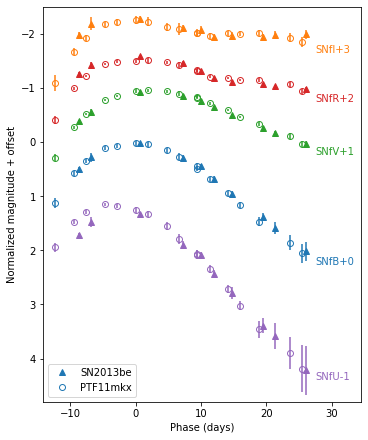

In [23]:
sn_1 = 'SNIC3573'
sn_2 = 'PTF11mkx'

target_names = np.array([i.name for i in a.targets])
idx_1 = np.where(target_names == sn_1)[0][0]
idx_2 = np.where(target_names == sn_2)[0][0]

t1 = a.targets[idx_1]
t2 = a.targets[idx_2]

bands = ['U', 'B', 'V', 'R', 'I']

band_colors = {
    'U': 'C4',
    'B': 'C0',
    'V': 'C2',
    'R': 'C3',
    'I': 'C1',
}

gap = 1.

def plot_lightcurve(target, marker='o', ls='--', mfc='none', label_bands=True):
    photometry = target.get_photometry(bands, clip_filter=True)
    
    # Cut late phases
    photometry = photometry[photometry['time'] < 30]
        
    ref_mag = target.salt_fit['fitted_model'].source_peakmag('snfb', 'ab')
    
    for offset, band in enumerate(bands):
        band_photometry = photometry[photometry['band'] == 'snf%s' % band.lower()]
        
        if band == 'B':
            label = a.iau_name_map.get(target.name, target.name)
        else:
            label = ''
            
        color = band_colors[band]
        
        phases = band_photometry['time']
        mags = -2.5*np.log10(band_photometry['flux']) - ref_mag - (offset - 1) * gap
        magerrs = band_photometry['magerr']
    
        plt.errorbar(phases, mags, magerrs, fmt='none', c=color)
        plt.plot(phases, mags, label=label, marker=marker, c=color, mfc=mfc, ls=ls)
        
        if label_bands:
            plt.text(phases[-1] + 2, mags[-1] + 0.2, 'SNf%s%+d' % (band, offset - 1), c=color)
            plt.xlim(None, phases[-1] + 9)

def plot_salt_lightcurve(target, phase_min=-6, phase_max=50):
    model = target.salt_fit['fitted_model']
    phases = np.linspace(phase_min, phase_max, 200)
    
    # Compute the reference magnitude for B-band at max.
    ref_mag = model.source_peakmag('snfb', 'ab')

    # Plot each light curve
    for offset, band in enumerate(bands):
        mags = model.bandmag('snf%s' % band.lower(), 'ab', phases) - ref_mag - (offset - 1) * gap
        plt.plot(phases, mags, c='k')


plt.figure(figsize=(5, 6))
plot_lightcurve(t1, marker='^', ls='', mfc=None, label_bands=False)
plot_lightcurve(t2, marker='o', ls='', mfc='none', label_bands=True)
# plot_salt_lightcurve(t1)
plt.legend()
plt.xlabel('Phase (days)')
plt.ylabel('Normalized magnitude + offset')
plt.ylim(4.8, -2.5)

a.savefig('same_salt_comparison.pdf')

# plt.gca().invert_yaxis()

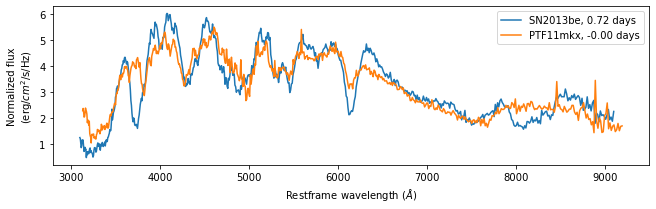

In [24]:
def plot_spec(ax, target):
    spec = target.get_nearest_spectrum(0)
    spec = spec.bin_by_velocity(500, min_wave=spec.wave[0], max_wave=spec.wave[-1])

    ref_mag = target.salt_fit['fitted_model'].source_peakmag('snfb', 'ab')
    
    label = '%s, %.2f days' % (a.iau_name_map.get(target.name, target.name), spec.phase)
    
    scale = 10**(+0.4*(ref_mag - 15))

    ax.plot(spec.wave, spec.flux * scale * spec.wave**2 / 5000.**2, label=label)
    
fig, ax = plt.subplots(figsize=a.settings['spectrum_plot_figsize'])

plot_spec(ax, t1)
plot_spec(ax, t2)

ax.set_xlabel('Restframe wavelength ($\AA$)')
ax.set_ylabel('Normalized flux\n(erg/$cm^2$/s/Hz)')

ax.legend()

a.savefig('same_salt_spectra.pdf')

In [25]:
# Check if these SNe~Ia are actually in the sample
all_mask = a.uncertainty_mask & a.redshift_color_mask & a.salt_mask
print(all_mask[idx_1])
print(all_mask[idx_2])

True
True


In [26]:
# Dump details to latex
with a.latex_open('salt_comparison.tex') as f:
    utils.latex_print(f, "")
    utils.latex_command(f, 'saltcompnamea', '%s', a.iau_name_map.get(t1.name, t1.name))
    utils.latex_command(f, 'saltcompnameb', '%s', a.iau_name_map.get(t2.name, t2.name))
    utils.latex_command(f, 'saltcompxonea', '$%.3f \\pm %.3f$', (t1['salt2.X1'], t1['salt2.X1.err']))
    utils.latex_command(f, 'saltcompxoneb', '$%.3f \\pm %.3f$', (t2['salt2.X1'], t2['salt2.X1.err']))
    utils.latex_command(f, 'saltcompca', '$%.3f \\pm %.3f$', (t1['salt2.Color'], t1['salt2.Color.err']))
    utils.latex_command(f, 'saltcompcb', '$%.3f \\pm %.3f$', (t2['salt2.Color'], t2['salt2.Color.err']))
    utils.latex_command(f, 'saltcompcoorda', '$%+.2f$', a.embedding[idx_1, 0])
    utils.latex_command(f, 'saltcompcoordb', '$%+.2f$', a.embedding[idx_2, 0])

    salt_hr_1 = a.residuals_salt['residuals'][idx_1]
    salt_hr_2 = a.residuals_salt['residuals'][idx_2]
    mag_diff = salt_hr_1 - salt_hr_2
    mag_err_1 = a.residuals_salt['raw_residual_uncertainties'][idx_1]
    mag_err_2 = a.residuals_salt['raw_residual_uncertainties'][idx_2]
    mag_diff_err = np.sqrt(mag_err_1**2 + mag_err_2**2)
    
    utils.latex_command(f, 'saltcompmagdiff', '$%.3f \\pm %.3f$', (mag_diff, mag_diff_err))

    manifold_mag_1 = a.residuals_salt_gp.residuals[idx_1]
    manifold_mag_2 = a.residuals_salt_gp.residuals[idx_2]
    manifold_mag_diff = manifold_mag_1 - manifold_mag_2
    manifold_mag_err_1 = a.residuals_salt_gp.raw_residual_uncertainties[idx_1]
    manifold_mag_err_2 = a.residuals_salt_gp.raw_residual_uncertainties[idx_2]
    manifold_mag_diff_err = np.sqrt(manifold_mag_err_1**2 + manifold_mag_err_2**2)
    
    utils.latex_command(f, 'saltcompmanifoldmagdiff', '$%.3f \\pm %.3f$', (manifold_mag_diff, manifold_mag_diff_err))


\newcommand{\saltcompnamea}{SN2013be}
\newcommand{\saltcompnameb}{PTF11mkx}
\newcommand{\saltcompxonea}{$0.443 \pm 0.171$}
\newcommand{\saltcompxoneb}{$0.558 \pm 0.132$}
\newcommand{\saltcompca}{$0.025 \pm 0.028$}
\newcommand{\saltcompcb}{$0.042 \pm 0.027$}
\newcommand{\saltcompcoorda}{$-0.26$}
\newcommand{\saltcompcoordb}{$+5.17$}
\newcommand{\saltcompmagdiff}{$0.311 \pm 0.096$}
\newcommand{\saltcompmanifoldmagdiff}{$-0.002 \pm 0.104$}


# Host galaxy correlations

## Consolidated host step calculation

In [27]:
import importlib
import hoststep
importlib.reload(hoststep)
from hoststep import fit_step, plot_step

masks = {
    'base': a.uncertainty_mask & a.redshift_color_mask & a.host_mask & a.peculiar_mask & a.salt_mask,
    'peculiar': a.uncertainty_mask & a.redshift_color_mask & a.host_mask & a.salt_mask,
    'train': a.uncertainty_mask & a.redshift_color_mask & a.host_mask & a.peculiar_mask & a.salt_mask & a.train_mask,
    'validation': a.uncertainty_mask & a.redshift_color_mask & a.host_mask & a.peculiar_mask & a.salt_mask & ~a.train_mask,
}

mag_vars = {
    'salt': (False, 'SALT2 + $x_1$'),
    'salt_raw': (True, 'SALT2 + Twins Embedding'),
    'rbtl': (True, 'RBTL + Twins Embedding'),
}

step_vars = {
    'host_gmass': ('host_p(highgmass)', 'Host Mass', -1),
    'host_lssfr': ('host_p(prompt)', 'Local SSFR', +1),
}

methods = [
    'fit'
    'gmm'
    'simultaneous'
]

def calc_step(kind, mask, step_var, method, verbosity=0, num_samples=100, plot=False, plot_title=None, **kwargs):
    use_gp, mag_label = mag_vars[kind]
    mask = masks[mask]
    
    if method == 'fit':
        # Fit the host step as part of the standardization
        side_probability, step_var_label, var_sign = step_vars[step_var]
        if use_gp:
            result = a.fit_gp_magnitude_residuals(
                kind=kind,
                mask=mask,
                additional_covariates=[a.indicators[side_probability]],
                verbosity=verbosity,
            )
            step = result.parameters[-1] * var_sign
            step_uncertainty = result.parameter_uncertainties[-1]
        else:
            ref, bootstrap = a.bootstrap_salt_magnitude_residuals(
                mask=mask,
                additional_covariates=[a.indicators[side_probability]],
                num_samples=num_samples
            )
            step = ref['covariate_amplitude_0'] * var_sign
            step_uncertainty = np.std(bootstrap['covariate_amplitude_0'])
    elif method == 'gmm':
        # Gaussian mixture model on the residuals after standardization.
        side_probability, step_var_label, var_sign = step_vars[step_var]
        if use_gp:
            gp_fit = a.fit_gp_magnitude_residuals(kind=kind, mask=mask, verbosity=verbosity)
            residuals = gp_fit.residuals
            residual_uncertainties = gp_fit.raw_residual_uncertainties
        else:
            salt_fit = a.fit_salt_magnitude_residuals(mask=mask, verbosity=verbosity)
            residuals = salt_fit['residuals']
            residual_uncertainties = salt_fit['raw_residual_uncertainties']

        step_result = fit_step(
            a.indicators[side_probability],
            residuals,
            residual_uncertainties,
            mask,
            verbosity=verbosity,
        )
        
        step = step_result['step_size'] * var_sign
        step_uncertainty = step_result['step_size_uncertainty']
        
        if plot:
            ax1, ax2 = plot_step(
                step_var,
                residuals,
                residual_uncertainties,
                a.indicators,
                mask,
                verbosity=verbosity,
                title=plot_title
            )
    elif method == 'simultaneous':
        # Simultaneous fit of both host properties during standardization.
        if use_gp:
            result = a.fit_gp_magnitude_residuals(
                kind=kind,
                mask=mask,
                additional_covariates=[a.indicators[step_vars[i][0]] for i in step_var],
                verbosity=verbosity,
            )
            step = result.parameters[-len(step_var):]
            step_uncertainty = result.parameter_uncertainties[-len(step_var):]
        else:
            ref, bootstrap = a.bootstrap_salt_magnitude_residuals(
                mask=mask,
                additional_covariates=[a.indicators[step_vars[i][0]] for i in step_var],
                num_samples=num_samples,
            )
            step = [ref[f'covariate_amplitude_{i}'] for i in range(len(step_var))]
            step_uncertainty = [np.std(bootstrap[f'covariate_amplitude_{i}']) for i in range(len(step_var))]
            
        # Apply signs
        for i, var_name in enumerate(step_var):
            step[i] *= step_vars[var_name][2]
    
    return step, step_uncertainty

## Plot steps

/home/kyle/packages/conda/lib/python3.8/site-packages/george/kernels.py:95: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)


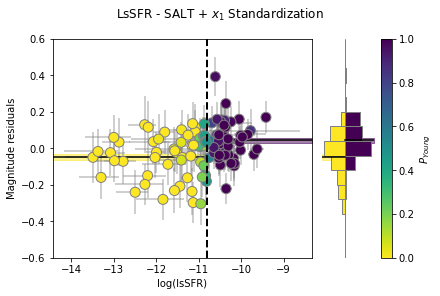

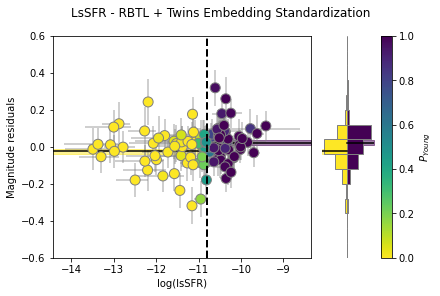

In [28]:
calc_step('salt', 'base', 'host_lssfr', 'gmm', plot=True, plot_title='LsSFR - SALT + $x_1$ Standardization')
a.savefig('host_step_lssfr_salt.pdf')
calc_step('rbtl', 'base', 'host_lssfr', 'gmm', plot=True, plot_title='LsSFR - RBTL + Twins Embedding Standardization')
a.savefig('host_step_lssfr_rbtl.pdf')

/home/kyle/packages/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/kyle/packages/conda/lib/python3.8/site-packages/george/kernels.py:95: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/home/kyle/packages/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


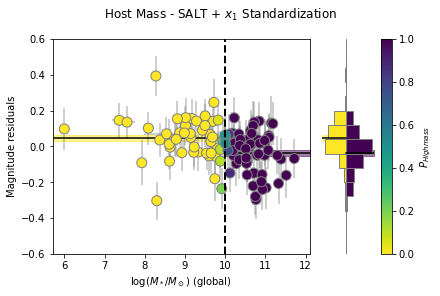

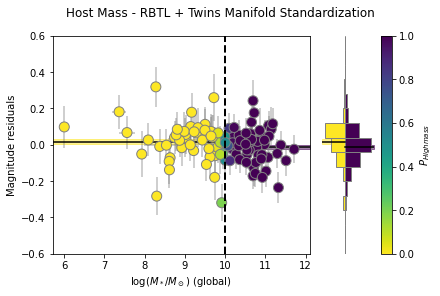

In [29]:
calc_step('salt', 'base', 'host_gmass', 'gmm', plot=True, plot_title='Host Mass - SALT + $x_1$ Standardization')
a.savefig('host_step_gmass_salt.pdf')
plt.draw()
calc_step('rbtl', 'base', 'host_gmass', 'gmm', plot=True, plot_title='Host Mass - RBTL + Twins Manifold Standardization')
a.savefig('host_step_gmass_rbtl.pdf')

## Host steps table

In [30]:
def print_row(f, mask, method, label):
    for step_var, (side_probability, step_var_label, var_sign) in step_vars.items():
        try:
            stat_str = f"{label.pop(0)}"
        except IndexError:
            stat_str = ""

        stat_str += f" & {step_var_label}"

        for mag_kind in mag_vars.keys():
            step, step_err = calc_step(mag_kind, mask, step_var, method)
            # stat_str += f" & {step:.3f} $\pm$ {step_err:.3f}"
            stat_str += f" & {step:.3f} & {step_err:.3f}"
        stat_str += " \\\\"
        utils.latex_print(f, stat_str)

        stat_str = f""

with a.latex_open('host_step_table.tex') as f:
    print_row(f, 'base', 'fit', ['Simultaneous fit'])
    utils.latex_print(f, '\\hline')
    print_row(f, 'base', 'gmm', ['After correction'])
    utils.latex_print(f, '\\hline')
    print_row(f, 'peculiar', 'fit', ['Peculiars included'])
    utils.latex_print(f, '\\hline')
    print_row(f, 'train', 'fit', ['Training subset'])
    utils.latex_print(f, '\\hline')
    print_row(f, 'validation', 'fit', ['Validation subset'])

Simultaneous fit & Host Mass & 0.092 & 0.024 & 0.036 & 0.025 & 0.040 & 0.020 \\


 & Local SSFR & 0.121 & 0.028 & 0.053 & 0.027 & 0.066 & 0.022 \\
\hline


/home/kyle/packages/conda/lib/python3.8/site-packages/george/kernels.py:95: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)


After correction & Host Mass & 0.082 & 0.021 & 0.030 & 0.023 & 0.032 & 0.018 \\
 & Local SSFR & 0.093 & 0.022 & 0.042 & 0.022 & 0.047 & 0.018 \\
\hline


Peculiars included & Host Mass & 0.059 & 0.030 & 0.030 & 0.025 & 0.031 & 0.020 \\


 & Local SSFR & 0.101 & 0.030 & 0.046 & 0.026 & 0.057 & 0.022 \\
\hline


Training subset & Host Mass & 0.077 & 0.031 & -0.005 & 0.033 & 0.026 & 0.026 \\


 & Local SSFR & 0.124 & 0.033 & 0.050 & 0.037 & 0.056 & 0.029 \\
\hline


Validation subset & Host Mass & 0.110 & 0.040 & 0.064 & 0.035 & 0.058 & 0.029 \\


 & Local SSFR & 0.119 & 0.057 & 0.018 & 0.039 & 0.057 & 0.033 \\


## Step difference

In [31]:
def bootstrap_step_difference(side_probabilities, residuals_1, uncertainties_1, residuals_2, uncertainties_2,
                              mask, num_resamples=1000, plot=False):
    mask_indices = np.where(mask)[0]
    
    ref_step_result_1 = fit_step(side_probabilities, residuals_1, uncertainties_1, mask, verbosity=0)
    ref_step_result_2 = fit_step(side_probabilities, residuals_2, uncertainties_2, mask, verbosity=0)
    print(ref_step_result_1['step_size'])
    print(ref_step_result_2['step_size'])
    
    ref_diff = ref_step_result_1['step_size'] - ref_step_result_2['step_size']

    step_diffs = []
    for bootstrap_iter in tqdm(range(num_resamples), desc='Bootstrapping', leave=False):
        bootstrap_idx = np.random.choice(len(mask_indices), len(mask_indices))
        bootstrap_mask = mask_indices[bootstrap_idx]

        step_result_1 = fit_step(side_probabilities, residuals_1, uncertainties_1, bootstrap_mask, verbosity=0, calculate_covariance=False)
        step_result_2 = fit_step(side_probabilities, residuals_2, uncertainties_2, bootstrap_mask, verbosity=0, calculate_covariance=False)

        step_diffs.append(step_result_1['step_size'] - step_result_2['step_size'])
        
    if plot:
        plt.figure()
        plt.hist(step_diffs, 30)

    return np.abs(ref_diff), np.std(step_diffs)

In [32]:
mask = masks['base']

gp_fit = a.fit_gp_magnitude_residuals('rbtl', mask=mask, verbosity=0)
salt_fit = a.fit_salt_magnitude_residuals(mask=mask, verbosity=0)

mass_step_diff, mass_step_diff_err = bootstrap_step_difference(
    a.indicators['host_p(highgmass)'],
    gp_fit.residuals,
    gp_fit.raw_residual_uncertainties,
    salt_fit['residuals'],
    salt_fit['raw_residual_uncertainties'],
    mask,
)

lssfr_step_diff, lssfr_step_diff_err = bootstrap_step_difference(
    a.indicators['host_p(prompt)'],
    gp_fit.residuals,
    gp_fit.raw_residual_uncertainties,
    salt_fit['residuals'],
    salt_fit['raw_residual_uncertainties'],
    mask,
)

with a.latex_open('host_step_differences.tex') as f:
    utils.latex_command(f, 'hoststepdiffmass', '%.3f $\\pm$ %.3f', (mass_step_diff, mass_step_diff_err))
    utils.latex_command(f, 'hoststepdiffmasssignificance', '%.1f', (mass_step_diff / mass_step_diff_err))
    utils.latex_command(f, 'hoststepdifflssfr', '%.3f $\\pm$ %.3f', (np.abs(lssfr_step_diff), lssfr_step_diff_err))
    utils.latex_command(f, 'hoststepdifflssfrsignificance', '%.1f', (np.abs(lssfr_step_diff) / lssfr_step_diff_err))

-0.032168787019729785
-0.0821309676780613


0.04662326377469184
0.0929957931721629


\newcommand{\hoststepdiffmass}{0.050 $\pm$ 0.014}
\newcommand{\hoststepdiffmasssignificance}{3.6}
\newcommand{\hoststepdifflssfr}{0.046 $\pm$ 0.013}
\newcommand{\hoststepdifflssfrsignificance}{3.6}


## Summary plot

In [33]:
plot_versions = [
    ('host_gmass', 'base', 'fit', 'Host Mass\nSimultaneous Fit'),
    ('host_gmass', 'base', 'gmm', 'Host Mass\nAfter Correction'),
    ('host_gmass', 'peculiar', 'fit', 'Host Mass\nPeculiars Included'),
    ('host_lssfr', 'base', 'fit', 'Local SSFR\nSimultaneous Fit'),
    ('host_lssfr', 'base', 'gmm', 'Local SSFR\nAfter Correction'),
    ('host_lssfr', 'peculiar', 'fit', 'Local SSFR\nPeculiars Included'),
]

host_plot_data = {}

for idx, (step_var, mask, method, label) in tqdm(enumerate(plot_versions), desc='Plot data'):
    steps = {}
    for mag_kind, (use_gp, mag_label) in mag_vars.items():
        steps[mag_label] = calc_step(mag_kind, mask, step_var, method)

    host_plot_data[label] = steps

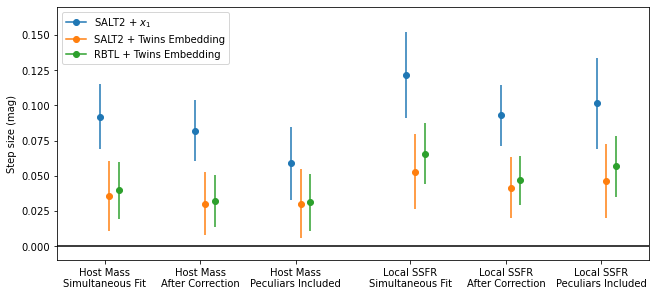

In [34]:
plt.figure(figsize=(9, 4))
labels = []

label_locs = [0, 1, 2, 3.2, 4.2, 5.2]

for prop_idx, (prop_label, prop_values) in enumerate(host_plot_data.items()):
    for mag_idx, (mag_label, mag_values) in enumerate(prop_values.items()):
        step_value, step_err = mag_values
        
        marker = 'oooo'[mag_idx]
        color = 'C%d' % (mag_idx)
        if prop_idx == 0:
            label = mag_label
        else:
            label = None
            
            
        gap = 0.1
        xpos = label_locs[prop_idx] - 0.5*gap + gap * mag_idx
        plt.errorbar(xpos, step_value, step_err, c=color, alpha=1.)
        plt.plot(xpos, step_value, marker=marker, c=color, label=label)
        
    labels.append(prop_label)

plt.xticks(label_locs, labels=labels)
plt.axhline(0., c='k')
plt.xlim(-0.5, label_locs[-1] + 0.5)
plt.ylim(-0.01, 0.17)

plt.ylabel('Step size (mag)')
plt.legend(loc=2)

a.savefig('host_step_summary.pdf')

## Host galaxy steps dump

In [35]:
with a.latex_open('host_galaxy_properties.tex') as f:
    utils.latex_command(f, 'hoststepfitrbtllssfr', '%.3f $\\pm$ %.3f', calc_step('rbtl', 'base', 'host_lssfr', 'fit'))
    utils.latex_command(f, 'hoststepfitsaltlssfr', '%.3f $\\pm$ %.3f', calc_step('salt', 'base', 'host_lssfr', 'fit'))
    utils.latex_command(f, 'hoststepgmmrbtllssfr', '%.3f $\\pm$ %.3f', calc_step('rbtl', 'base', 'host_lssfr', 'gmm'))
    utils.latex_command(f, 'hoststepgmmsaltlssfr', '%.3f $\\pm$ %.3f', calc_step('salt', 'base', 'host_lssfr', 'gmm'))
    utils.latex_command(f, 'hoststeppeculiarrbtllssfr', '%.3f $\\pm$ %.3f', calc_step('rbtl', 'peculiar', 'host_lssfr', 'fit'))
    utils.latex_command(f, 'hoststeppeculiarsaltlssfr', '%.3f $\\pm$ %.3f', calc_step('salt', 'peculiar', 'host_lssfr', 'fit'))

    utils.latex_command(f, 'hoststepfitrbtlmass', '%.3f $\\pm$ %.3f', calc_step('rbtl', 'base', 'host_gmass', 'fit'))
    utils.latex_command(f, 'hoststepfitsaltmass', '%.3f $\\pm$ %.3f', calc_step('salt', 'base', 'host_gmass', 'fit'))
    utils.latex_command(f, 'hoststepgmmrbtlmass', '%.3f $\\pm$ %.3f', calc_step('rbtl', 'base', 'host_gmass', 'gmm'))
    utils.latex_command(f, 'hoststepgmmsaltmass', '%.3f $\\pm$ %.3f', calc_step('salt', 'base', 'host_gmass', 'gmm'))
    utils.latex_command(f, 'hoststeppeculiarrbtlmass', '%.3f $\\pm$ %.3f', calc_step('rbtl', 'peculiar', 'host_gmass', 'fit'))
    utils.latex_command(f, 'hoststeppeculiarsaltmass', '%.3f $\\pm$ %.3f', calc_step('salt', 'peculiar', 'host_gmass', 'fit'))

\newcommand{\hoststepfitrbtllssfr}{0.066 $\pm$ 0.022}


\newcommand{\hoststepfitsaltlssfr}{0.121 $\pm$ 0.029}


/home/kyle/packages/conda/lib/python3.8/site-packages/george/kernels.py:95: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)


\newcommand{\hoststepgmmrbtllssfr}{0.047 $\pm$ 0.018}
\newcommand{\hoststepgmmsaltlssfr}{0.093 $\pm$ 0.022}
\newcommand{\hoststeppeculiarrbtllssfr}{0.057 $\pm$ 0.022}


\newcommand{\hoststeppeculiarsaltlssfr}{0.101 $\pm$ 0.033}
\newcommand{\hoststepfitrbtlmass}{0.040 $\pm$ 0.020}


\newcommand{\hoststepfitsaltmass}{0.092 $\pm$ 0.027}
\newcommand{\hoststepgmmrbtlmass}{0.032 $\pm$ 0.018}
\newcommand{\hoststepgmmsaltmass}{0.082 $\pm$ 0.021}
\newcommand{\hoststeppeculiarrbtlmass}{0.031 $\pm$ 0.020}


\newcommand{\hoststeppeculiarsaltmass}{0.059 $\pm$ 0.030}


# Attrition

In [6]:
with a.latex_open('attrition_table.tex') as f:
    utils.latex_print(f, "\\textbf{General selection requirements} & \\\\")
    # utils.latex_print(f, "SNe Ia with at least 5 SNfactory spectra            & %d \\\\" % a.attrition_enough_spectra)
    utils.latex_print(f, "SNe Ia Included in Twins Embedding (Paper I)                & %d \\\\" % np.sum(a.uncertainty_mask))
    utils.latex_print(f, "\hline")

    utils.latex_print(f, "\\textbf{Standardization of near-maximum spectra} & \\\\")
    utils.latex_print(f, r"\textbf{(Section~\ref{sec:magnitude_requirements})} & \\")
    utils.latex_print(f, "Host galaxy redshift available                      & %d \\\\" % np.sum(a.uncertainty_mask & (a.redshift_errs < 0.004)))
    utils.latex_print(f, "Host galaxy redshift above 0.02                     & %d \\\\" % np.sum(a.uncertainty_mask & (a.redshift_errs < 0.004) & (a.redshifts > 0.02)))
    utils.latex_print(f, "RBTL $\\tilde{A}_V$ < 0.5 mag                            & %d \\\\" % np.sum(a.uncertainty_mask & a.redshift_color_mask))
    utils.latex_print(f, "Blinded training subsample                          & %d \\\\" % np.sum(a.uncertainty_mask & a.redshift_color_mask & a.train_mask))
    utils.latex_print(f, "Validation subsample                                & %d \\\\" % np.sum(a.uncertainty_mask & a.redshift_color_mask & ~a.train_mask))
    utils.latex_print(f, "\hline")
    
    utils.latex_print(f, "\\textbf{Comparisons to SALT2 standardization} & \\\\")
    utils.latex_print(f, r"\textbf{(Section~\ref{sec:salt2_standardization})} & \\")
    # utils.latex_print(f, "Included in Twins Embedding (Paper I)                & %d \\\\"% np.sum(a.uncertainty_mask))
    utils.latex_print(f, "Passes SALT2 selection requirements                 & %d \\\\"% np.sum(a.salt_mask & a.uncertainty_mask))
    utils.latex_print(f, "Passes host galaxy redshift and color requirements  & %d \\\\"% np.sum(a.salt_mask & a.uncertainty_mask & a.redshift_color_mask))
    utils.latex_print(f, "Blinded training subsample                          & %d \\\\"% np.sum(a.salt_mask & a.uncertainty_mask & a.redshift_color_mask & a.train_mask))
    utils.latex_print(f, "Validation subsample                                & %d \\\\"% np.sum(a.salt_mask & a.uncertainty_mask & a.redshift_color_mask & ~a.train_mask))

\textbf{General selection requirements} & \\
SNe Ia Included in Twins Embedding (Paper I)                & 173 \\
\hline
\textbf{Standardization of near-maximum spectra} & \\
\textbf{(Section~\ref{sec:magnitude_requirements})} & \\
Host galaxy redshift available                      & 168 \\
Host galaxy redshift above 0.02                     & 144 \\
RBTL $\tilde{A}_V$ < 0.5 mag                            & 134 \\
Blinded training subsample                          & 72 \\
Validation subsample                                & 62 \\
\hline
\textbf{Comparisons to SALT2 standardization} & \\
\textbf{(Section~\ref{sec:salt2_standardization})} & \\
Passes SALT2 selection requirements                 & 155 \\
Passes host galaxy redshift and color requirements  & 127 \\
Blinded training subsample                          & 66 \\
Validation subsample                                & 61 \\


In [37]:
with a.latex_open('attrition_parameters.tex') as f:
    utils.latex_command(f, 'nummanifoldsne', '%d', np.sum(a.uncertainty_mask))
    utils.latex_print(f, "")
    utils.latex_command(f, 'numsnftrain', '%d', np.sum([i.subset == 'training' for i in a.targets[a.uncertainty_mask]]))
    utils.latex_command(f, 'numsnftraincombined', '%d', np.sum([i.subset != 'validation' for i in a.targets[a.uncertainty_mask]]))
    utils.latex_command(f, 'numsnfvalid', '%d', np.sum([i.subset == 'validation' for i in a.targets[a.uncertainty_mask]]))
    utils.latex_command(f, 'numsnfother', '%d', np.sum([i.subset not in ['training', 'validation'] for i in a.targets[a.uncertainty_mask]]))
    utils.latex_print(f, "")
    utils.latex_command(f, 'numsnredshift', '%d', np.sum(a.uncertainty_mask & (a.redshift_errs >= 0.004)))
    utils.latex_command(f, 'numlowredshift', '%d', np.sum(a.uncertainty_mask & (a.redshifts <= 0.02)))
    utils.latex_command(f, 'numhighav', '%d', np.sum(a.uncertainty_mask & (a.rbtl_colors - np.median(a.rbtl_colors) >= 0.5)))
    utils.latex_print(f, "")
    utils.latex_command(f, 'nummagsne', '%d', np.sum(a.uncertainty_mask & a.redshift_color_mask))
    utils.latex_command(f, 'nummagsnetrain', '%d', np.sum(a.uncertainty_mask & a.redshift_color_mask & a.train_mask))
    utils.latex_command(f, 'nummagsnevalidation', '%d', np.sum(a.uncertainty_mask & a.redshift_color_mask & ~a.train_mask))
    utils.latex_print(f, "")
    utils.latex_command(f, 'numbadsalt', '%d', np.sum(a.uncertainty_mask & ~a.salt_mask))
    utils.latex_command(f, 'numsaltsne', '%d', np.sum(a.uncertainty_mask & a.salt_mask))
    utils.latex_command(f, 'numsaltmagsne', '%d', np.sum(a.uncertainty_mask & a.salt_mask & a.redshift_color_mask))
    utils.latex_command(f, 'numsaltmagsnetrain', '%d', np.sum(a.uncertainty_mask & a.salt_mask & a.redshift_color_mask & a.train_mask))
    utils.latex_command(f, 'numsaltmagsnevalidation', '%d', np.sum(a.uncertainty_mask & a.salt_mask & a.redshift_color_mask & ~a.train_mask))
    utils.latex_print(f, "")
    utils.latex_command(f, 'numhostmagsne', '%d', np.sum(a.uncertainty_mask & a.host_mask & a.redshift_color_mask))
    utils.latex_command(f, 'numhostmagsnetrain', '%d', np.sum(a.uncertainty_mask & a.host_mask & a.redshift_color_mask & a.train_mask))
    utils.latex_command(f, 'numhostmagsnevalidation', '%d', np.sum(a.uncertainty_mask & a.host_mask & a.redshift_color_mask & ~a.train_mask))
    utils.latex_print(f, "")
    utils.latex_command(f, 'numsalthostmagsne', '%d', np.sum(a.uncertainty_mask & a.salt_mask & a.host_mask & a.redshift_color_mask & a.peculiar_mask))
    utils.latex_command(f, 'numsalthostmagsnetrain', '%d', np.sum(a.uncertainty_mask & a.salt_mask & a.host_mask & a.redshift_color_mask & a.train_mask & a.peculiar_mask))
    utils.latex_command(f, 'numsalthostmagsnevalidation', '%d', np.sum(a.uncertainty_mask & a.salt_mask & a.host_mask & a.redshift_color_mask & ~a.train_mask & a.peculiar_mask))
    utils.latex_print(f, "")

\newcommand{\nummanifoldsne}{173}

\newcommand{\numsnftrain}{78}
\newcommand{\numsnftraincombined}{97}
\newcommand{\numsnfvalid}{76}
\newcommand{\numsnfother}{19}

\newcommand{\numsnredshift}{5}
\newcommand{\numlowredshift}{24}
\newcommand{\numhighav}{17}

\newcommand{\nummagsne}{134}
\newcommand{\nummagsnetrain}{72}
\newcommand{\nummagsnevalidation}{62}

\newcommand{\numbadsalt}{18}
\newcommand{\numsaltsne}{155}
\newcommand{\numsaltmagsne}{127}
\newcommand{\numsaltmagsnetrain}{66}
\newcommand{\numsaltmagsnevalidation}{61}

\newcommand{\numhostmagsne}{112}
\newcommand{\numhostmagsnetrain}{61}
\newcommand{\numhostmagsnevalidation}{51}

\newcommand{\numsalthostmagsne}{105}
\newcommand{\numsalthostmagsnetrain}{57}
\newcommand{\numsalthostmagsnevalidation}{48}



# Explaining the residual dispersion with RV variation

In [38]:
m = a.residuals_rbtl_gp.mask
# ref_disp = np.sqrt(np.var(a.residuals_rbtl_gp.residuals[m]) - np.mean(a.calculate_peculiar_velocity_uncertainties(a.redshifts)[m]**2))
# print(ref_disp)
ref_disp = a.residuals_rbtl_gp.parameter_dict['intrinsic_dispersion']
print(ref_disp)
color_std = np.std(a.rbtl_colors[m])
print(color_std)
rv_frac_diff = ref_disp / color_std
print(rv_frac_diff)

rbtlgprv, rbtlgprvdiff = a.calculate_fit_rv(rbtl_gp.parameters[4], rbtl_gp.parameter_uncertainties[4])

print(rbtlgprv * rv_frac_diff)

0.07282679678268611
0.18957695467277647
0.38415427079937237
0.9214166002359545
